# **Analysis for one trial**

## This analysis script is for a single trial.

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [6]:
# name="pk3864-07022022-0109"
# name="pk3855-21022022-0101"
name="pk3864-09022022-0109"

Check the path

In [7]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk3864/pk3864-09022022-0109/
Mouse: pk3864
Session: 09022022-0109
Name: pk3864-09022022-0109 , pk3864-09022022-0109

Path: OK


## Get a Session object

Check the files

In [8]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3864-09022022-0109
path = /adata/electro/pk3864/pk3864-09022022-0109
subject = pk3864
session_dat_time = 2022-02-09 01:09:00
fileBase = /adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109
file_names = {'par': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.par', 'desen': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.desen', 'desel': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.desel', 'sampling_rate': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.sampling_rate_dat', 'stimulation': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.stimulation', 'px_per_cm': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.px_per_cm', 'setup': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.setup', 'environmentFamiliarity': '/adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.environmentFamiliarity', 'params':

## Load spikes

In [9]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids",stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids [ 1  3  4  5 10 14 17 18 19 20 22 23 25 29 30 31 33 34 38 39 46 49 57 60
 66 74 75 76 77 79 81 85 90 91 92 93]


## Load the waveforms

Set the waveform and channel information from the session template file.

In [10]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 89 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 3573966 , clusters: 85
Init shanks: 8


## Create a pose file 

In [11]:
ap = Animal_pose(ses)
posefilename = ses.fileBase + ap.pose_file_extension
print("look for", posefilename)
if not os.path.exists(posefilename):
    print("load from positrack")
    extension = ap.positrack_type()
    print("use extension:",extension)
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension=extension)
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

look for /adata/electro/pk3864/pk3864-09022022-0109/pk3864-09022022-0109.pose.npy
load from saved pose file


In [12]:
ap.invalid_ratio()

0.08277477416017147

In [13]:
ses.trial_intervals.inter

array([[   0.     , 1419.29995],
       [1419.3    , 1520.17195],
       [1520.172  , 2814.65995],
       [2814.66   , 2886.55195],
       [2886.552  , 4091.97595],
       [4091.976  , 4219.99195],
       [4219.992  , 5479.48795],
       [5479.488  , 5632.01995],
       [5632.02   , 7035.94795]])

In [14]:
ses.trial_intervals.inter[0]

array([   0.     , 1419.29995])

In [15]:
# find good shape automagically & crop
diameter=70.
xyrange_min,xyrange_max=ap.find_xy_range(diameter=diameter)  ###-> do this within intervals , for each trial + use min/max to find best square that covers most of the area
xmean,ymean = ap.meanloc
print("xmean,ymean",xmean,ymean)
print("xyrange_min,xyrange_max",xyrange_min,xyrange_max)

xmean,ymean 49.60506528158118 58.864975809992885
xyrange_min,xyrange_max [14.60506528 23.86497581] [84.60506528 93.86497581]


Plot the path of the animal to see if it was loaded correctly.

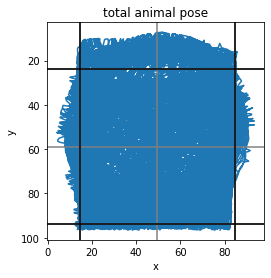

In [16]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter([xmean],[ymean], color="black", s=20)
plt.axvline(x=xmean, color="gray")
plt.axhline(y=ymean, color="gray")
plt.axvline(x=xmean+diameter/2, color="gray")
plt.axhline(y=ymean+diameter/2, color="gray")
plt.axvline(x=xmean-diameter/2, color="gray")
plt.axhline(y=ymean-diameter/2, color="gray")

plt.axvline(x=xyrange_min[0], color="black")
plt.axvline(x=xyrange_max[0], color="black")
plt.axhline(y=xyrange_min[1], color="black")
plt.axhline(y=xyrange_max[1], color="black")

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("total animal pose")
plt.show()

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

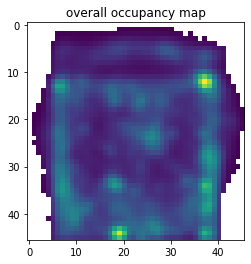

In [17]:
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map.T)
plt.title("overall occupancy map")
plt.show()

Plot the head-direction of the animal and its position a short segment.

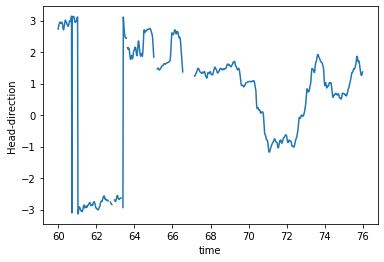

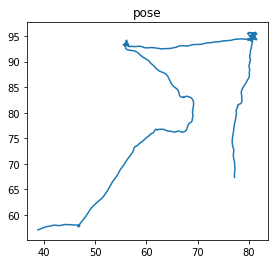

In [18]:
s=3000
e=3800

plt.plot(ap.pose[s:e,0], ap.pose[s:e,4])
plt.xlabel("time")
plt.ylabel("Head-direction")
plt.show()

plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("pose")
plt.show()

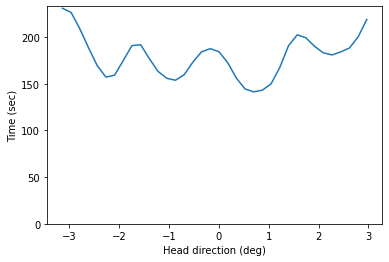

In [19]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")
plt.show()

## Overview

In [20]:
iv=ses.trial_intervals.inter
iv=np.array([0.,1200.])
iv=ses.trial_intervals.inter[0]

In [21]:
print("use interval",iv)

use interval [   0.      1419.29995]


i/n 0 1
n 1419.29995
ap 1419.29995
n.name 1
n.spike_train.ifr (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0, 0, 0, ..., 0, 0, 0]), array([1.00000e-02, 3.00000e-02, 5.00000e-02, ..., 1.41925e+03,
       1.41927e+03, 1.41929e+03]))
n.spike_train.st [   3.9052     3.98615    4.07055 ... 1416.22105 1416.9535  1416.99305]
i/n 1 3
n 1419.29995
ap 1419.29995
i/n 2 4
n 1419.29995
ap 1419.29995
i/n 3 5
n 1419.29995
ap 1419.29995
i/n 4 10
n 1419.29995
ap 1419.29995
i/n 5 14
n 1419.29995
ap 1419.29995
i/n 6 17
n 1419.29995
ap 1419.29995
i/n 7 18
n 1419.29995
ap 1419.29995
n.name 18
n.spike_train.ifr (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0, 0, 0, ..., 0, 0, 0]), array([1.00000e-02, 3.00000e-02, 5.00000e-02, ..., 1.41925e+03,
       1.41927e+03, 1.41929e+03]))
n.spike_train.st [2.9550000e-01 3.1040000e-01 1.4694000e+00 ... 1.4172751e+03 1.4173151e+03
 1.4173160e+03]
i/n 8 19
n 1419.29995
ap 1419.29995
n.name 19
n.spike_train.ifr (array([17.719278  , 32.27403 

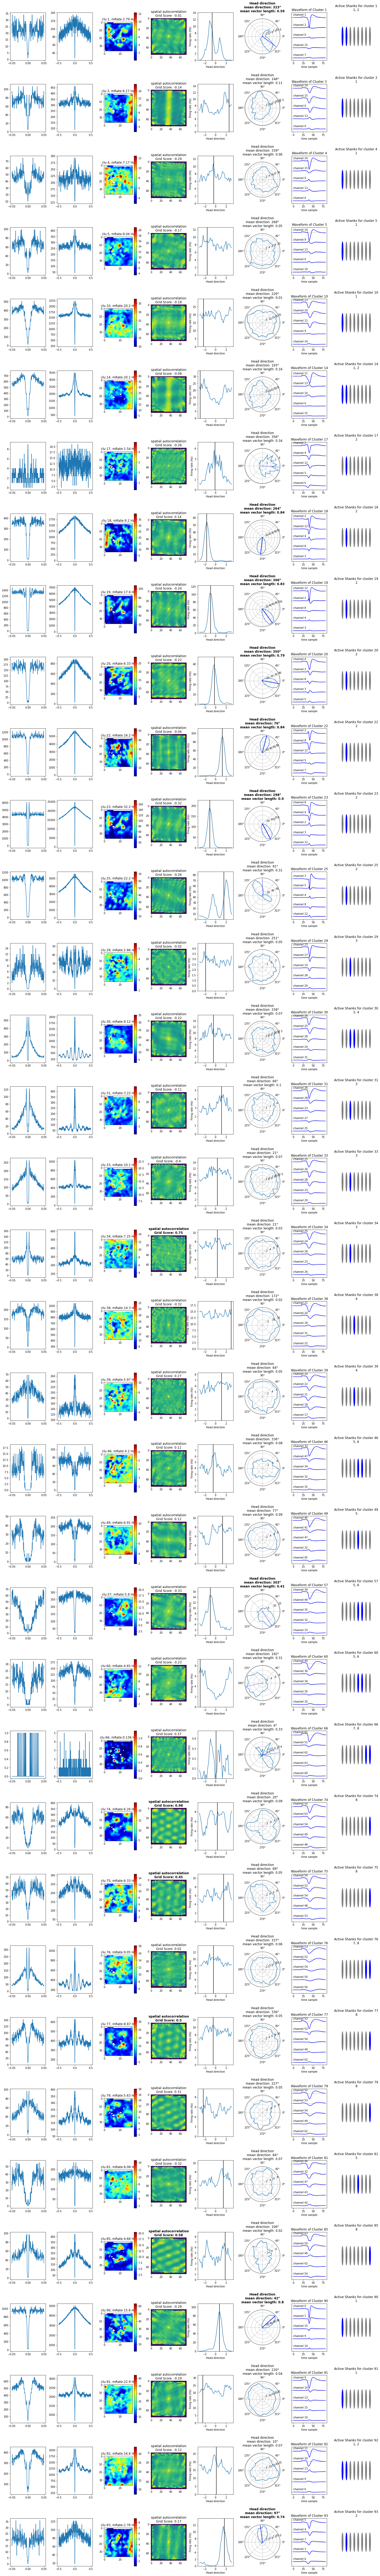

In [23]:
hd_firing_list=[] # neurons tuning curve
hd_ifr_list=[] # ifr list
spike_trains = [] # spike trains


# from matplotlib.patches import Rectangle

cols = 8

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25, 5*len(cg.neuron_list)))
   
for i, n in enumerate(cg.neuron_list):
    
    # first interval only
    # iv = ses.trial_intervals.inter[0]
    # iv = np.array([iv])
    # custom interval (first 20min of light-dark-protocol -> light baseline)
    # iv=np.array([0.,1200.])
    #iv=np.array([6000.,7200.]) # last 20mins
    #iv=light_intervals
    # iv=np.array(first_block)

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    
    n.set_spatial_properties(ap)
    
    print("i/n",i,n.name)
    print("n",n.spike_train.intervals.total_interval_duration_seconds())
    print("ap",ap.intervals.total_interval_duration_seconds())
    
    
    
    # temporal auto-correlation
      
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    # clear intervals
    
    # n.spike_train.unset_intervals()
    # ap.unset_intervals()
    # n.spike_train.set_intervals(ses.trial_intervals.inter)
    # ap.set_intervals(ses.trial_intervals.inter)
    
    # spatial firing map 
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    # Spatial autocorrelation Map & Grid Score
    gs = n.spatial_properties.grid_score()
    
    fw = "bold" if gs>.4 else "normal"
    
    axs[i,3].imshow(n.spatial_properties.spatial_autocorrelation_map)
    axs[i,3].set_title("spatial autocorrelation"+"\n"+"Grid Score: "+str(round(gs,2)), fontweight=fw)
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()
    
    axs[i,4].plot(angles, hd_firing)
    axs[i,4].set_xlabel("Head direction")
    axs[i,4].set_ylabel("Firing rate (Hz)")
    axs[i,4].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)*1.2)
    axs[i,4].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    fw = "bold" if hd_mean_vector_length>.4 else "normal"
    axs[i,5].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*i+6, polar=True)
    #ax2.plot(angles, hd_firing)
    ax2.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
    ax2.plot([hd_mean_direction_rad]*2, [0,max(hd_firing)] , color="blue", alpha=hd_mean_vector_length, lw=2.5  )
    ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw) 
    ax2.grid(True)
    
    
    # Waveforms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel)
            axs[i,6].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,6].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,6].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,6].set_xlabel("time sample")
        axs[i,6].set(yticklabels=[])  
        axs[i,6].set_title("Waveform of Cluster "+str(cluster))
        
    # shanks
    shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)
   
    for j, (shank, active) in enumerate(zip(ses.shanks_all, shanks_arr)):
        color = 'blue' if active else 'gray'
        circle = plt.Circle((j,0), 0.2, color=color)
        axs[i,7].add_patch(circle)

    
    axs[i,7].axis('off')
    axs[i,7].set_title("Active Shanks for cluster "+str(cluster)+"\n"+', '.join([str(int(active_shank)) for active_shank in active_shanks]))
    
    axs[i,7].set_xlim([-1, len(ses.shanks_all)])
    axs[i,7].set_ylim([-0.5, 0.5])
    
    ###########################
    # classify, find category: Grid cell, HD cell
    
    if (hd_mean_vector_length > 0.4):
        n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
        print("n.name",n.name)
        print("n.spike_train.ifr",n.spike_train.ifr)
        print("n.spike_train.st",n.spike_train.st)
        
        hd_firing_list.append(hd_firing)
        hd_ifr_list.append(n.spike_train.ifr)
        spike_trains.append(n.spike_train.st)
        
        #rect = Rectangle((0.08, 1-(i+.5)/len(cg.neuron_list)), 0.85, 1/len(cg.neuron_list), facecolor='yellow', edgecolor='none', transform=fig.transFigure, zorder=-1)
        #fig.patches.append(rect)

    
    
#plt.tight_layout()
fig.subplots_adjust(wspace=0.33, hspace=.5)
# plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'.pdf')
plt.show()


angles.shape (36,)
hd_firing_list.shape (10, 36)
hd_ifr_list.shape (10, 3, 60448)
spike_trains.shape (10,)


array([1.00000e-02, 3.00000e-02, 5.00000e-02, ..., 1.20891e+03,
       1.20893e+03, 1.20895e+03])

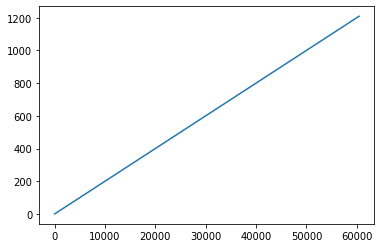

In [20]:
angles = np.array(angles)
print("angles.shape",angles.shape)

hd_firing_list = np.array(hd_firing_list)
print("hd_firing_list.shape",hd_firing_list.shape)

hd_ifr_list = np.array(hd_ifr_list)
print("hd_ifr_list.shape",hd_ifr_list.shape)

spike_trains = np.array(spike_trains)
print("spike_trains.shape",spike_trains.shape)
'''
np.save("angles.npy",angles)
np.save("hd_firing_list.npy",hd_firing_list)
np.save("hd_ifr_list.npy",hd_ifr_list)
np.save("ap-pose.npy",ap.pose)
np.save("spike_trains.npy",spike_trains)
#'''
plt.plot(hd_ifr_list[0,2])
ap.pose[:,0].shape
hd_ifr_list[0,2,:].shape
ap.pose[:,0]
hd_ifr_list[0,2,:]

In [29]:
iv

array([   0.     , 1419.29995])

In [30]:
times = np.linspace(iv[0],iv[1],10)
times

array([   0.        ,  157.69999444,  315.39998889,  473.09998333,
        630.79997778,  788.49997222,  946.19996667, 1103.89996111,
       1261.59995556, 1419.29995   ])

In [31]:
sub_intervals = ap.times2intervals(times)


In [72]:
n=cg.neuron_list[-1] #12,22,0,7

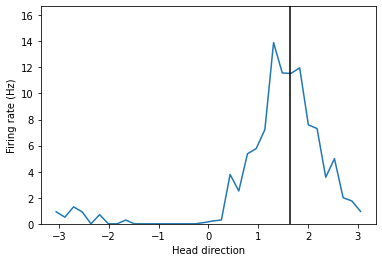

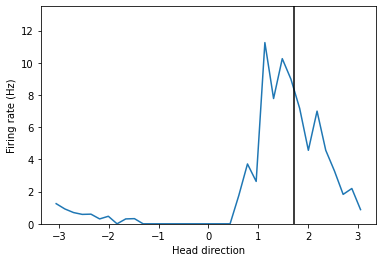

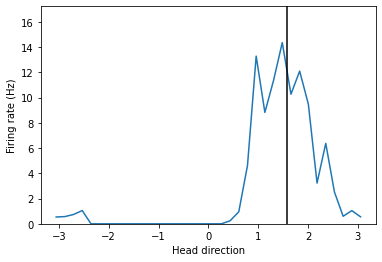

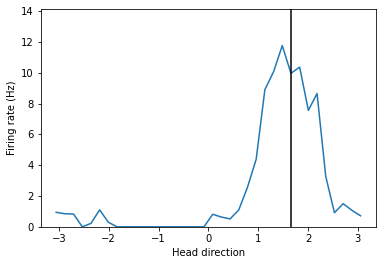

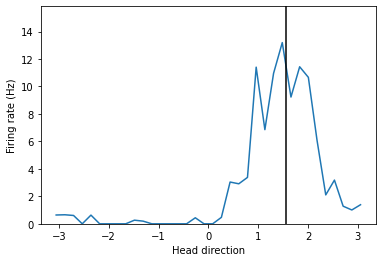

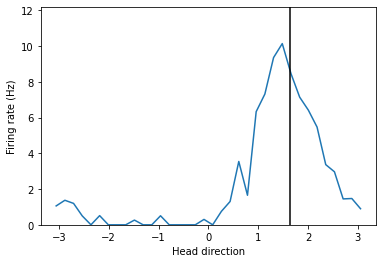

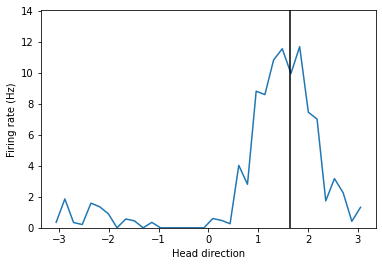

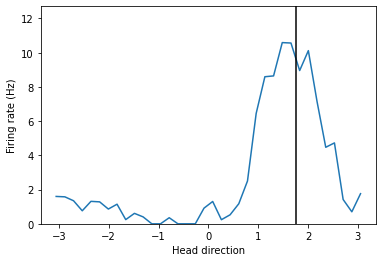

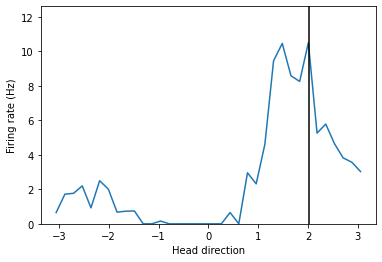

In [73]:
hd_firing_all = []

for sub_interval in sub_intervals:

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(sub_interval)
    ap.set_intervals(sub_interval)

    n.set_spatial_properties(ap)



    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

    plt.plot(angles, hd_firing)
    plt.xlabel("Head direction")
    plt.ylabel("Firing rate (Hz)")
    plt.ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)*1.2)
    plt.axvline(x=hd_mean_direction_rad, color="black")
    plt.show()
    
    hd_firing_all.append(hd_firing)



In [74]:
# https://stackoverflow.com/a/33505522

from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

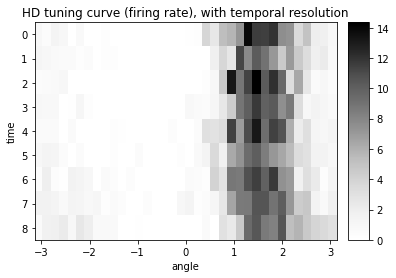

In [75]:
im = plt.pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
plt.xlabel("angle")
plt.ylabel("time")
plt.gca().invert_yaxis()
plt.title("HD tuning curve (firing rate), with temporal resolution")
plt.show()

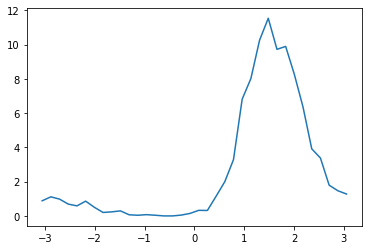

In [76]:
plt.plot(angles, np.mean(hd_firing_all, axis=0))

In [1]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=False, figsize=(8,4))
fig.subplots_adjust(hspace=0)

im = axes[0].pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
axes[0].xlabel("angle")
axes[0].ylabel("time")
axes[0].gca().invert_yaxis()
plt.suptitle("HD tuning curve (firing rate), with temporal resolution")
plt.show()

NameError: name 'plt' is not defined